# 2.0数据准备

In [23]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. 加载数据 [1]
iris = datasets.load_iris()
X = iris.data[:, [1, 3]]
y = iris.target

# 2. 分割训练集和测试集 (30%测试) [3, 4]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

# 3. 特征标准化（对感知器、逻辑回归、SVM和KNN至关重要） [5, 6]
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 可视化工具函数：绘制决策区域 [2, 7]
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=f'Class {cl}', edgecolor='black')
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', 
                    alpha=1.0, linewidth=1, marker='o', s=100, label='Test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# 2.1sk-learn 感知机

感知机准确率: 0.911

分类报告:
              precision    recall  f1-score   support

      setosa       0.88      1.00      0.94        15
  versicolor       0.87      0.87      0.87        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

混淆矩阵:
[[15  0  0]
 [ 2 13  0]
 [ 0  2 13]]


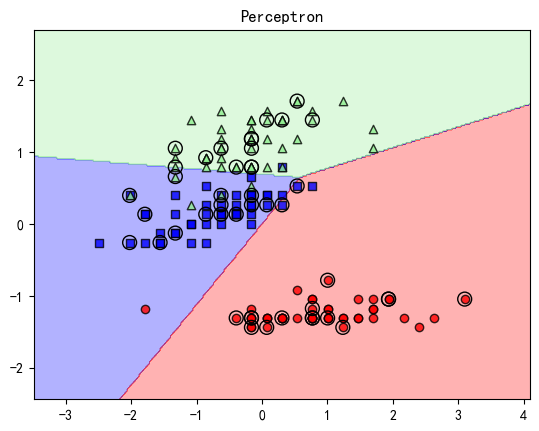

In [15]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# 训练感知器 [8]
# 参数说明：eta0=0.1(学习率)，random_state=1(随机种子确保可复现)
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

# 预测与评估 [8, 10]
y_pred = ppn.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)
print(f'感知机准确率: {acc:.3f}')
print(f'\n分类报告:\n{classification_report(y_test, y_pred, target_names=iris.target_names)}')

# 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'混淆矩阵:\n{conf_matrix}')

# 可视化 [7]
plot_decision_regions(X_combined_std, y_combined, classifier=ppn, test_idx=range(105, 150))
plt.title('Perceptron')
plt.show()

# 2.2逻辑回归和正则化

Probabilities of first 3 samples:
[[7.02027911e-08 8.54220035e-02 9.14577926e-01]
 [9.74965891e-01 2.50341081e-02 1.03435362e-09]
 [8.86634742e-01 1.13365256e-01 1.98284328e-09]]

逻辑回归准确率: 1.000

分类报告:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

混淆矩阵:
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]


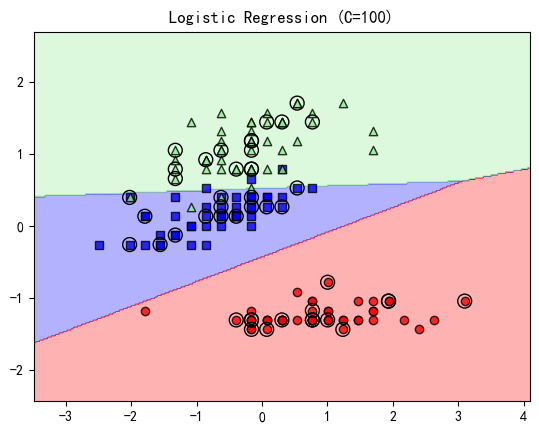

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 训练逻辑回归（使用 OvR 处理多分类） [14]
# 参数说明：C=100.0(正则化强度倒数，C越大正则化越弱)，solver='lbfgs'(求解器)，multi_class='ovr'(一对多)
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr', max_iter=1000)
lr.fit(X_train_std, y_train)

# 预测概率示例 [15]
prob = lr.predict_proba(X_test_std[:3, :])
print(f'Probabilities of first 3 samples:\n{prob}\n')

# 性能评估
y_pred_lr = lr.predict(X_test_std)
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f'逻辑回归准确率: {acc_lr:.3f}')
print(f'\n分类报告:\n{classification_report(y_test, y_pred_lr, target_names=iris.target_names)}')

# 混淆矩阵
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(f'混淆矩阵:\n{conf_matrix_lr}')

# 可视化决策区域 [14]
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.title('Logistic Regression (C=100)')
plt.show()

# 2.3支持向量机和核方法

线性SVM准确率: 1.000
支持向量个数: 32

RBF-SVM准确率: 1.000
支持向量个数: 45

RBF-SVM分类报告:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

混淆矩阵:
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]


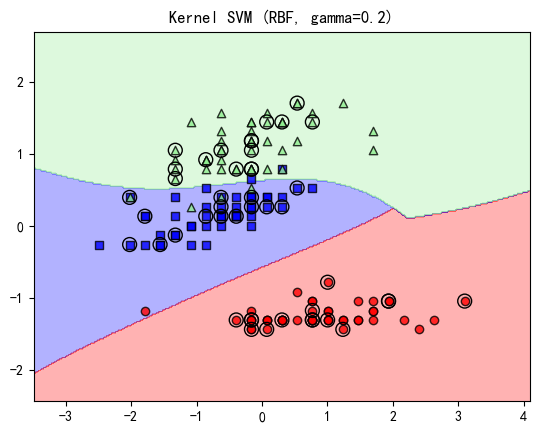

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. 线性 SVM [19]
# 参数说明：kernel='linear'(线性核)，C=1.0(正则化强度)，random_state=1(随机种子)
svm_linear = SVC(kernel='linear', C=1.0, random_state=1)
svm_linear.fit(X_train_std, y_train)

y_pred_linear = svm_linear.predict(X_test_std)
acc_linear = accuracy_score(y_test, y_pred_linear)
print(f'线性SVM准确率: {acc_linear:.3f}')
print(f'支持向量个数: {len(svm_linear.support_vectors_)}\n')

# 2. 核 SVM (使用 RBF 核处理非线性) [18, 20]
# gamma 参数控制"高斯球"的影响范围，gamma 越大，决策边界越紧凑 [20, 21]
# 参数说明：kernel='rbf'(RBF核)，gamma=0.2(核系数)，C=1.0(正则化强度)
svm_rbf = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm_rbf.fit(X_train_std, y_train)

y_pred_rbf = svm_rbf.predict(X_test_std)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
print(f'RBF-SVM准确率: {acc_rbf:.3f}')
print(f'支持向量个数: {len(svm_rbf.support_vectors_)}')
print(f'\nRBF-SVM分类报告:\n{classification_report(y_test, y_pred_rbf, target_names=iris.target_names)}')

# 混淆矩阵
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
print(f'混淆矩阵:\n{conf_matrix_rbf}')

# 可视化核 SVM 结果 [20]
plot_decision_regions(X_combined_std, y_combined, classifier=svm_rbf, test_idx=range(105, 150))
plt.title('Kernel SVM (RBF, gamma=0.2)')
plt.show()

# 2.4决策树

决策树准确率: 0.978
树的深度: 4
叶子节点数: 7

分类报告:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

混淆矩阵:
[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]

特征重要性:
  Petal Length: 0.033
  Petal Width:  0.967


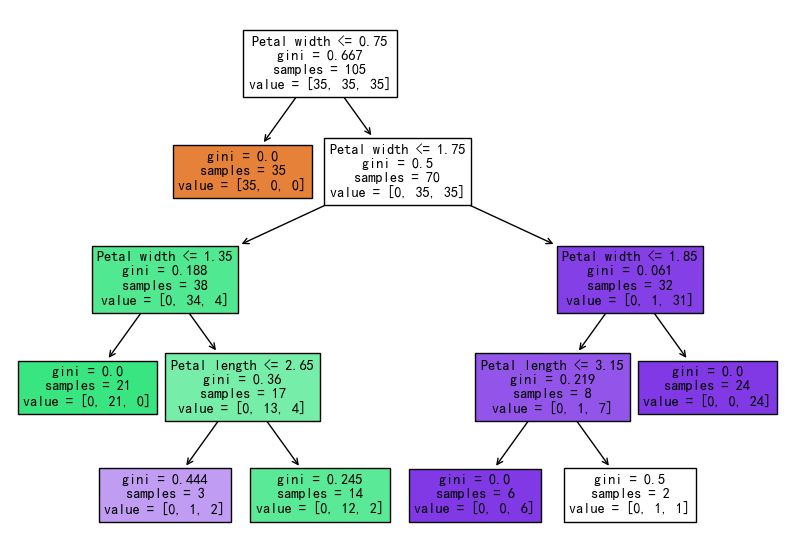

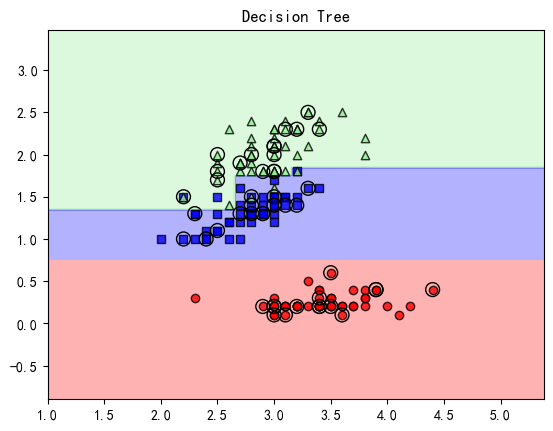

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 训练决策树（限制最大深度为4以防过拟合） [23]
# 参数说明：criterion='gini'(基尼杂质分割标准)，max_depth=4(最大深度限制过拟合)
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train) # 决策树可以使用非标准化数据

# 性能评估
y_pred_tree = tree_model.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)
print(f'决策树准确率: {acc_tree:.3f}')
print(f'树的深度: {tree_model.get_depth()}')
print(f'叶子节点数: {tree_model.get_n_leaves()}')
print(f'\n分类报告:\n{classification_report(y_test, y_pred_tree, target_names=iris.target_names)}')

# 混淆矩阵
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print(f'混淆矩阵:\n{conf_matrix_tree}')

# 特征重要性
feature_importance = tree_model.feature_importances_
print(f'\n特征重要性:')
print(f'  Petal Length: {feature_importance[0]:.3f}')
print(f'  Petal Width:  {feature_importance[1]:.3f}')

# 可视化决策树结构 [24]
plt.figure(figsize=(10, 7))
tree.plot_tree(tree_model, filled=True, 
               feature_names=['Petal length', 'Petal width'])
plt.show()

# 绘制决策区域 [23]
X_combined_orig = np.vstack((X_train, X_test))
plot_decision_regions(X_combined_orig, y_combined, classifier=tree_model, test_idx=range(105, 150))
plt.title('Decision Tree')
plt.show()

# 2.5KNN

KNN(k=5)准确率: 1.000

分类报告:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

混淆矩阵:
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]


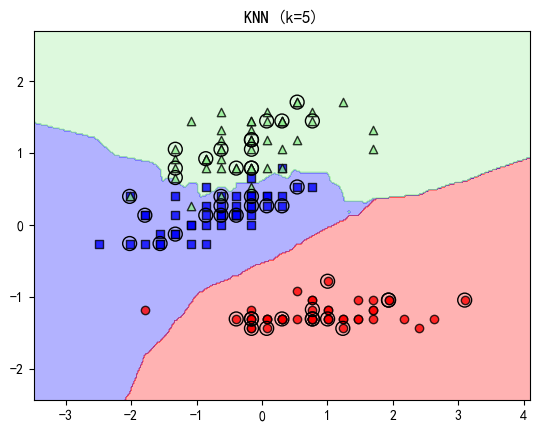

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 训练 KNN (选择 5 个邻居，p=2 表示欧式距离) [6, 27]
# 参数说明：n_neighbors=5(邻居个数)，p=2(欧式距离)，metric='minkowski'(明可夫斯基距离)
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

# 性能评估
y_pred_knn = knn.predict(X_test_std)
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN(k=5)准确率: {acc_knn:.3f}')
print(f'\n分类报告:\n{classification_report(y_test, y_pred_knn, target_names=iris.target_names)}')

# 混淆矩阵
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print(f'混淆矩阵:\n{conf_matrix_knn}')

# 可视化 [27]
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))
plt.title('KNN (k=5)')
plt.show()


# 2.6 模型对比与分析


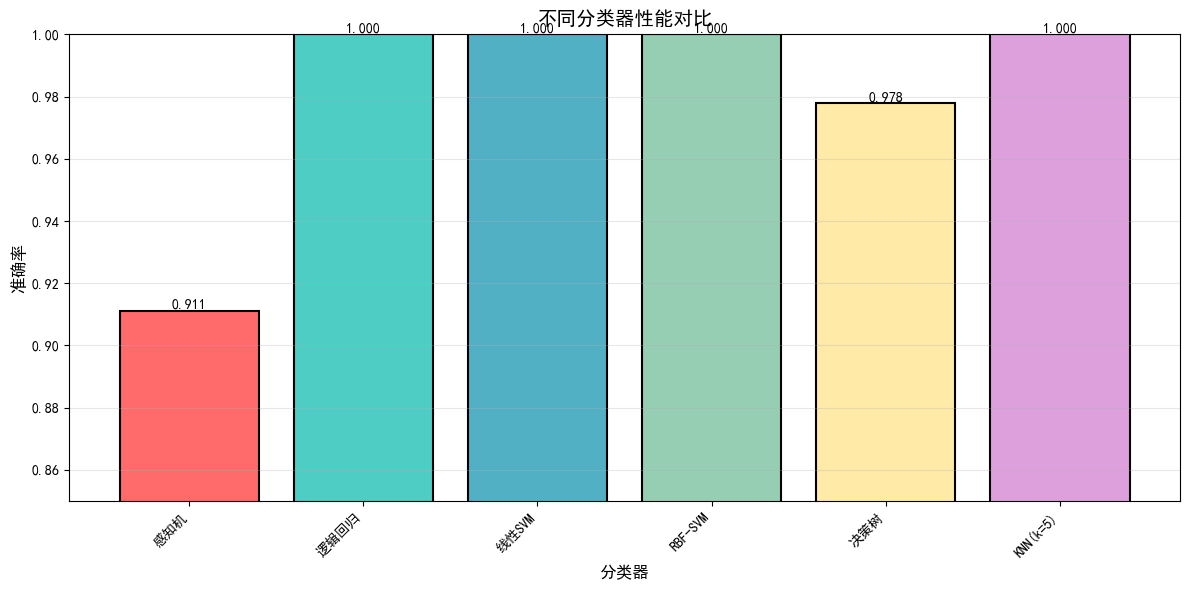

模型性能总结表
     分类器   准确率                         关键参数
     感知机 0.911                     eta0=0.1
    逻辑回归 1.000                      C=100.0
   线性SVM 1.000         kernel=linear, C=1.0
 RBF-SVM 1.000 kernel=rbf, gamma=0.2, C=1.0
     决策树 0.978                  max_depth=4
KNN(k=5) 1.000                n_neighbors=5

最优模型: 逻辑回归 (准确率: 1.000)


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 配置matplotlib全局中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 汇总所有模型的性能
models_performance = {
    '感知机': {
        '准确率': accuracy_score(y_test, ppn.predict(X_test_std)),
        '精确率': [],
        '召回率': [],
        '参数': 'eta0=0.1'
    },
    '逻辑回归': {
        '准确率': accuracy_score(y_test, lr.predict(X_test_std)),
        '精确率': [],
        '召回率': [],
        '参数': 'C=100.0'
    },
    '线性SVM': {
        '准确率': accuracy_score(y_test, svm_linear.predict(X_test_std)),
        '精确率': [],
        '召回率': [],
        '参数': 'kernel=linear, C=1.0'
    },
    'RBF-SVM': {
        '准确率': accuracy_score(y_test, svm_rbf.predict(X_test_std)),
        '精确率': [],
        '召回率': [],
        '参数': 'kernel=rbf, gamma=0.2, C=1.0'
    },
    '决策树': {
        '准确率': accuracy_score(y_test, tree_model.predict(X_test)),
        '精确率': [],
        '召回率': [],
        '参数': 'max_depth=4'
    },
    'KNN(k=5)': {
        '准确率': accuracy_score(y_test, knn.predict(X_test_std)),
        '精确率': [],
        '召回率': [],
        '参数': 'n_neighbors=5'
    }
}

# 提取准确率进行对比
accuracies = {name: info['准确率'] for name, info in models_performance.items()}

# 绘制准确率对比图
plt.figure(figsize=(12, 6))
models = list(accuracies.keys())
accs = list(accuracies.values())
colors = ['#FF6B6B', '#4ECDC4', "#52B0C5", '#96CEB4', '#FFEAA7', '#DDA0DD']

bars = plt.bar(models, accs, color=colors, edgecolor='black', linewidth=1.5)
plt.ylabel('准确率', fontsize=12)
plt.xlabel('分类器', fontsize=12)
plt.title('不同分类器性能对比', fontsize=14, fontweight='bold')
plt.ylim([0.85, 1.0])

# 在柱子上显示准确率数值
for bar, acc in zip(bars, accs):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{acc:.3f}', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 打印性能总结表
print("=" * 80)
print("模型性能总结表")
print("=" * 80)
summary_df = pd.DataFrame({
    '分类器': list(accuracies.keys()),
    '准确率': [f'{acc:.3f}' for acc in accuracies.values()],
    '关键参数': [info['参数'] for info in models_performance.values()]
})
print(summary_df.to_string(index=False))
print("=" * 80)

# 最优模型
best_model = max(accuracies, key=accuracies.get)
print(f'\n最优模型: {best_model} (准确率: {accuracies[best_model]:.3f})')